<a href="https://colab.research.google.com/github/sksos7/2020_03_01_Hollys/blob/master/ai_sc13x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [ ]:
import numpy as np

c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

np.dot(c,d)
# 두 벡터의 내적이 0이라면 직교
# 두 내적값이 42가 나오므로 직교하지 않음.

42

## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [ ]:
# 역행렬, 전치행렬 구하기
e = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

print(e, "원래 형렬\n")
print(np.linalg.inv(e), "역행렬\n")
print(e.T, "전치 행렬")

[[ 7  4  2]
 [ 1  3 -1]
 [ 2  6 -4]] 원래 형렬

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 역행렬

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]] 전치 행렬


## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [ ]:
# |F| 는 행렬식을 의미
f = np.array([[2,-2,5],
              [4,1,10],
              [12,6,30]])

np.linalg.det(f)
# |F| = 0 
# 즉, 행렬식 = 0 이라면 역행렬을 갖지 않는 행렬

0.0

## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [ ]:
# 공분산, 상관계수 구하기
import pandas as pd

data = {'x':[820, 760, 1250, 990, 1080, 1450, 1600],'y':[0,1,7,1,0,6,4]}

df_cc = pd.DataFrame(data)
df_cc

,x,y
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0
5,1450,6
6,1600,4


In [ ]:
# covariance (공분산)
# 편차가 매우 큼
df_cc.cov()

,x,y
x,98761.904762,670.238095
y,670.238095,8.571429


In [ ]:
# correlation (상관계수)
# 그 편차를 줄이기 위해 상관계수 사용 -> 스케일 조정
df_cc.corr()

,x,y
x,1.000000,0.728463
y,0.728463,1.000000


## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# df.shape # (4,18)
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [ ]:
# df 의 'country' 열은 라벨로 따로 빼서 저장
df_country = df['Country']

df_tmp = df.iloc[:,1:]
# df_tmp.shape # (4,17)

# 정규화
scaler = StandardScaler()
Z = scaler.fit_transform(df_tmp)

df_std = pd.DataFrame(data=Z, columns=df_tmp.columns)
# df_std.shape # (4,17)
df_std

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_std)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

pca_data = pca.transform(df_std)
print("\n Projected Data: \n", pca_data)


 Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]
 [ 0.18723888  0.15327713 -0.30439545  0.20499304 -0.34010234 -0.05073161
  -0.11338943  0.35064519  0.07333507 -0.32037834  0.33340494  0.2428402
  -0.38616448 -0.14839777 -0.17168328 -0.11736728 -0.24529742]
 [ 0.02196958 -0.77105819 -0.52488165 -0.16541733 -0.18373907  0.09843172
   0.02503024  0.06022834  0.06782655  0.01963462 -0.03654902 -0.13677752
   0.12775703 -0.03912885  0.08170022 -0.0562769  -0.04117441]]

 Eigenvalues: 
 [1.54876508e+01 5.63749203e+00 1.54152380e+00 5.50234212e-32]

 Projected Data: 
 [[-9.54489838e-01  3.28318325e-01  1.829

In [ ]:
df_pca = pd.DataFrame(data=pca_data, columns=['PC1','PC2','PC3','PC4'])
df_pca

,PC1,PC2,PC3,PC4
0,-0.954490,0.328318,1.829829,-4.891008e-17
1,-4.520951,-1.735380,-0.781412,-4.463072e-16
2,0.487978,3.233672,-0.765148,1.425331e-15
3,4.987462,-1.826611,-0.283270,-1.140965e-15


In [ ]:
pca.explained_variance_ratio_
# 약, PC1=68%, PC2=24%, PC3=6%, PC4 = .....
# pca.explained_variance_ratio_.sum() -> 결과는 1
# PC1+PC2 로도 92% 가 넘으므로 2차원으로 차원줄이기

array([6.83278713e-01, 2.48712884e-01, 6.80084029e-02, 2.42750388e-33])

In [ ]:
df_pca_dr = df_pca.loc[:,['PC1','PC2']]
df_pca_dr

,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


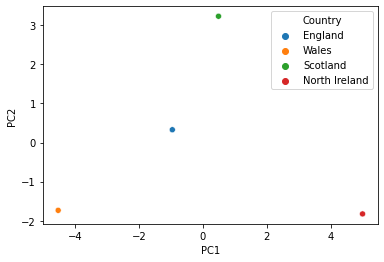

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위해 데이터셋을 concat
df_visual = pd.concat([df_pca_dr,df_country],axis=1)

# 시각화
sns.scatterplot(x=df_visual['PC1'], y=df_visual['PC2'],
                hue=df_visual['Country'])

plt.show()

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [ ]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [ ]:
# points.shape # (200, 2)
from sklearn.cluster import KMeans 

# StandardScaler를 적용
scaler_points = StandardScaler()
Z_points = scaler_points.fit_transform(points)

# 데이터셋으로
df_kmean = pd.DataFrame(data=Z_points, columns=points.columns)
df_kmean.head()

,x,y
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


In [ ]:
# k-means clustering을 적용
# k 값은 디폴트값 8 로 설정 
kmean = KMeans()
k = kmean.fit(df_kmean)

k.labels_

array([2, 1, 4, 2, 4, 1, 2, 2, 3, 6, 6, 1, 4, 6, 2, 4, 2, 1, 5, 7, 2, 7,
       7, 7, 5, 6, 4, 3, 6, 6, 5, 5, 4, 7, 6, 1, 5, 1, 3, 4, 4, 7, 3, 3,
       3, 1, 5, 1, 2, 4, 0, 2, 2, 3, 7, 4, 1, 3, 3, 2, 0, 4, 2, 3, 0, 3,
       7, 3, 2, 3, 5, 1, 6, 6, 7, 7, 6, 6, 3, 7, 3, 1, 6, 1, 3, 1, 3, 5,
       6, 0, 3, 1, 0, 5, 4, 6, 5, 6, 5, 4, 5, 5, 2, 6, 1, 7, 2, 2, 2, 7,
       4, 7, 6, 2, 5, 1, 3, 3, 7, 3, 7, 4, 6, 2, 6, 2, 5, 7, 3, 2, 4, 2,
       6, 2, 3, 3, 4, 7, 2, 1, 3, 5, 5, 7, 4, 3, 5, 3, 2, 1, 5, 4, 2, 7,
       6, 3, 4, 7, 1, 2, 4, 5, 3, 2, 0, 7, 5, 3, 4, 4, 2, 4, 3, 7, 4, 5,
       1, 5, 6, 2, 1, 4, 1, 5, 4, 5, 2, 7, 3, 4, 5, 2, 7, 2, 6, 3, 0, 7,
       5, 4], dtype=int32)

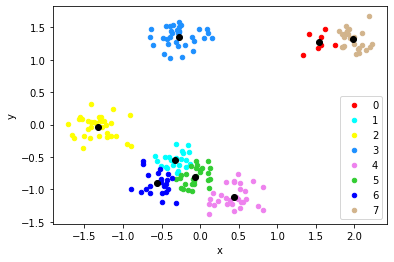

In [ ]:
# 라벨 별로 그리는 함수
def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow',
            3:'dodgerblue', 4:'violet', 5:'limegreen', 6:'blue', 7:'tan'}
  fig, ax = plt.subplots()
  for i in range(0, len(centroids)):
    ax.plot(centroids.iloc[i].x, centroids.iloc[i].y, "ok") # 기존 중심점
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()

# kmean으로 나온 라벨 값들을 원래 데이터셋에 추가
new_series = pd.Series(k.labels_)
df_kmean['label'] = new_series.values

centroids = df_kmean.groupby('label').mean()

plot_clusters(df_kmean, 'label', centroids)


# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


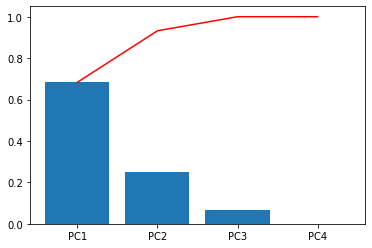

In [ ]:
# 6번의 PCA 결과에 대해서 Scree plot을 추가
# X 축에는 PC의 components
# Y 축에는 각 구성 요소가 설명하는 분산의 백분율
plt.bar(df_pca.columns, pca.explained_variance_ratio_)
plt.plot(df_pca.columns,
         [pca.explained_variance_ratio_[0],
          sum(pca.explained_variance_ratio_[0:2]),
          sum(pca.explained_variance_ratio_[0:3]),
          sum(pca.explained_variance_ratio_[0:4])],
         color='r')

plt.show()

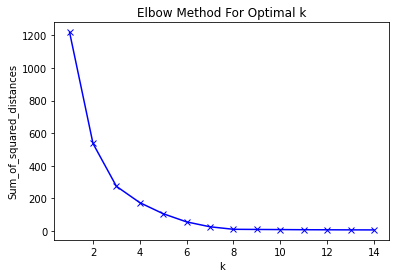

In [ ]:
# 7번에서 k값을 선택하는 과정을 논리적으로 설명
"""
적절한 k 값을 찾기 위해

Elbow methods (엘보우 기법) 을 사용

k 값을 1부터 특정 값까지 증가시키면서 군집화를 실행 실행하면서
클러스터내의 오차제곱합(군집 내 평균과의 차이 제곱 합, SSE- Sum of Squared Error) 이
최소가 되도록 하는데 이것이 가장 적은 클러스터 갯수를
최적의 클러스터 갯수로 가정한다.

k가 늘어낼수록 대략적으로 오류율이 급속히 줄어들다가
어느시점부터 오류율이 거의 감소하지 않는 지점이 발생하는데
이 지점을 최적 K 로 선택한다. 
"""
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_kmean)
    # 군집 내 평균과의 차이 제곱 합
    # kmeans.inertia_ : KMeans 모듈에서 제공되는 함수
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 즉, 디폴트 값인 k=8 이 가장 최적의 k값이다.